<a href="https://colab.research.google.com/github/yuguerten/Royal-Air-Maroc-Customer-Review-Sentiment-Analyzer-using-NLP./blob/master/Royal_Air_Maroc_Sentiment_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [63]:
reviews = pd.read_csv('reviews_air_maroc.csv',encoding='latin-1')

In [64]:
reviews.head()

,Review,Review_Length
0,casablanca to laayoune morocco and casablanca ...,594
1,london gatwick to agadir via casablanca on the...,2536
2,i just had a short flight from casablanca to m...,227
3,casablancamunich after horrible experience of ...,419
4,not impressed at all i flew from london heathr...,716


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review         192 non-null    object
 1   Review_Length  192 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [65]:
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [67]:
reviews['ID'] = reviews.index

In [68]:
reviews.drop('Review_Length',axis=1,inplace=True)

In [69]:
reviews

,Review,ID
0,casablanca to laayoune morocco and casablanca ...,0
1,london gatwick to agadir via casablanca on the...,1
2,i just had a short flight from casablanca to m...,2
3,casablancamunich after horrible experience of ...,3
4,not impressed at all i flew from london heathr...,4
...,...,...
187,the worst airlines i have ever flown the fligh...,187
188,we had no problems in terms of flight times or...,188
189,i have flown with royal air maroc over times...,189
190,jfk to casablanca delayed hours with no commu...,190


In [72]:
# Function to remove stop words from a text
def remove_stop_words(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'Reviews' column
reviews['Review'] = reviews['Review'].apply(remove_stop_words)

In [73]:
# Create empty lists to store sentiment scores
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []

# Iterate through each row in the DataFrame
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    Review = row['Review']

    # Calculate sentiment scores for the individual review
    sentiment_scores = sia.polarity_scores(Review)

    # Append the sentiment scores to the corresponding lists
    positive_scores.append(sentiment_scores['pos'])
    negative_scores.append(sentiment_scores['neg'])
    neutral_scores.append(sentiment_scores['neu'])
    compound_scores.append(sentiment_scores['compound'])

# Add new columns to the DataFrame with sentiment scores
reviews['Positive_Score'] = positive_scores
reviews['Negative_Score'] = negative_scores
reviews['Neutral_Score'] = neutral_scores
reviews['Compound_Score'] = compound_scores

  0%|          | 0/192 [00:00<?, ?it/s]

In [74]:
reviews

,Review,ID,Positive_Score,Negative_Score,Neutral_Score,Compound_Score
0,casablanca laayoune morocco casablanca jfk fir...,0,0.058,0.132,0.810,-0.5859
1,london gatwick agadir via casablanca journey q...,1,0.026,0.115,0.860,-0.9554
2,short flight casablanca marrakech royal air ma...,2,0.300,0.127,0.573,0.6275
3,casablancamunich horrible experience casablanc...,3,0.413,0.052,0.535,0.9729
4,impressed flew london heathrowcasablanca beara...,4,0.106,0.282,0.612,-0.9022
...,...,...,...,...,...,...
187,worst airlines ever flown flight geneva marrak...,187,0.053,0.209,0.738,-0.8034
188,problems terms flight times delays flight atte...,188,0.137,0.251,0.612,-0.6151
189,flown royal air maroc times within last months...,189,0.187,0.130,0.683,0.6737
190,jfk casablanca delayed hours communication gro...,190,0.076,0.247,0.677,-0.8720


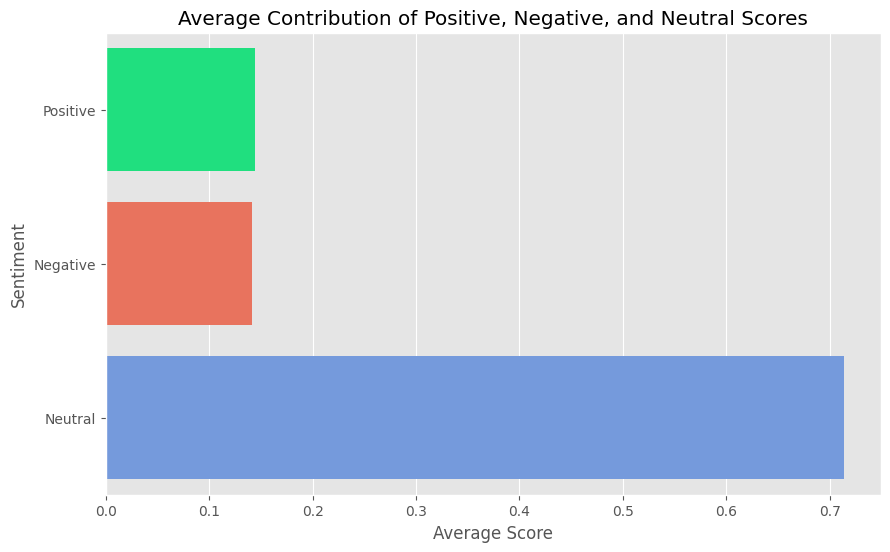

In [75]:
# Calculate the average scores for each sentiment category
avg_positive = reviews['Positive_Score'].mean()
avg_negative = reviews['Negative_Score'].mean()
avg_neutral = reviews['Neutral_Score'].mean()

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=[avg_positive, avg_negative, avg_neutral], y=['Positive', 'Negative', 'Neutral'], palette=['springgreen', 'tomato', 'cornflowerblue'])
plt.title('Average Contribution of Positive, Negative, and Neutral Scores')
plt.xlabel('Average Score')
plt.ylabel('Sentiment')
plt.show()

**interpretation**:
After analyzing the sentiment scores of customer reviews for Royal air Maroc services, it is noteworthy that the average contribution of neutral sentiment is the highest, followed by negative sentiment and, surprisingly, positive sentiment. This pattern suggests that a significant portion of the reviews tends to express neutral feelings, indicating a possibly balanced or indifferent sentiment among customers.

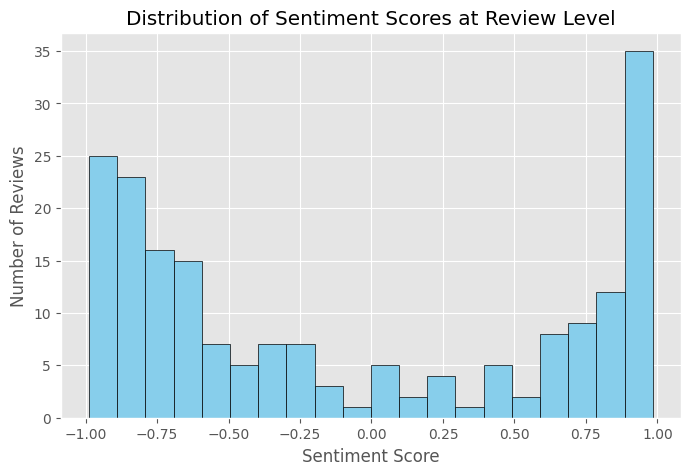

In [76]:
# Apply sentiment analysis to each review
reviews['Sentiment_Score'] = reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize distribution of sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(reviews['Sentiment_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores at Review Level')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()

In [81]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [83]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
reviews['Sentiment_Score'] = reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Tokenize and preprocess the text
stop_words = set(stopwords.words('english'))
# Add custom stop words
custom_stop_words = set(['get','another','even','still','thing','one','due','next'])  # Add your specific words here
stop_words.update(custom_stop_words)

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Tokenize and preprocess the reviews
reviews['Tokens'] = reviews['Review'].apply(preprocess_text)

# Identify common positive and negative phrases
positive_reviews = reviews.loc[reviews['Sentiment_Score'] > 0, 'Tokens']
negative_reviews = reviews.loc[reviews['Sentiment_Score'] < 0, 'Tokens']

common_positive_phrases = Counter([word for review in positive_reviews for word in review])
common_negative_phrases = Counter([word for review in negative_reviews for word in review])

# Print common positive and negative phrases
print("Common Positive Phrases:")
print(common_positive_phrases.most_common(5))  # Adjust the number as needed

print("\nCommon Negative Phrases:")
print(common_negative_phrases.most_common(5))  # Adjust the number as needed

Common Positive Phrases:
[('flight', 139), ('casablanca', 74), ('time', 49), ('good', 46), ('staff', 41)]

Common Negative Phrases:
[('flight', 245), ('casablanca', 118), ('hours', 66), ('staff', 65), ('airport', 49)]


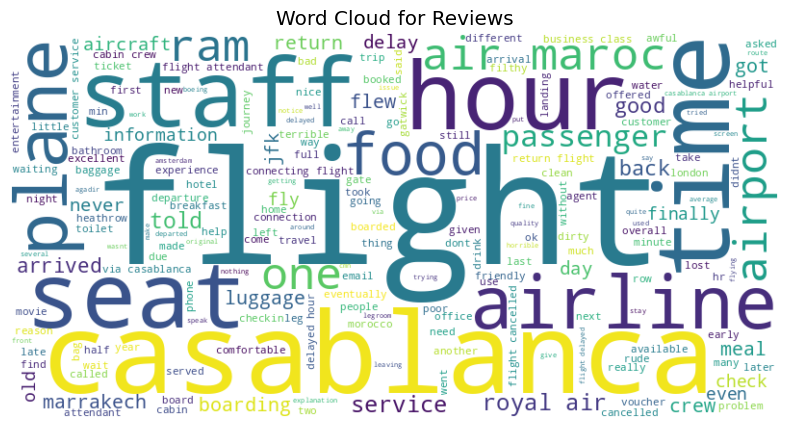

In [84]:
# Tokenize and preprocess the reviews again for creating word cloud
text = ' '.join(reviews['Review'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

In [ ]:
reviews